**Impact Analysis of Covid-19**





In [ ]:
#importing libraries 
import numpy as np      
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from functools import reduce
import calendar
import pandas as pd
# datetime oprations
from datetime import timedelta
# interactive visualization
! pip install plotly==4.14.1
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

Reading Data - The dataframe represents the Deaths occurred in United States due to COVID-19 from the time period of January to December.

Glancing at data, it can be observed that data is not ready in form using it. The columns currently present in data is 256.

In [ ]:
# read data
covid_deaths_us = pd.read_csv("https://storage.googleapis.com/mydata-777/timeseries_of_deaths.csv")
covid_deaths_us.head()


UID iso2 iso3  code3  ...  11/29/2020 11/30/2020 12/1/2020 12/2/2020
0  84001001   US  USA    840  ...          42         42        42        42
1  84001003   US  USA    840  ...          98         98       137       137
2  84001005   US  USA    840  ...          11         11        11        29
3  84001007   US  USA    840  ...          17         17        18        38
4  84001009   US  USA    840  ...          40         40        40        43

[5 rows x 328 columns]

In [ ]:
covid_deaths_us.head()


UID iso2 iso3  code3  ...  11/29/2020 11/30/2020 12/1/2020 12/2/2020
0  84001001   US  USA    840  ...          42         42        42        42
1  84001003   US  USA    840  ...          98         98       137       137
2  84001005   US  USA    840  ...          11         11        11        29
3  84001007   US  USA    840  ...          17         17        18        38
4  84001009   US  USA    840  ...          40         40        40        43

[5 rows x 328 columns]

Checking the Datatype for the given dataframe

In [ ]:
# checking for datatypes
covid_deaths_us.info()
type(covid_deaths_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Columns: 328 entries, UID to 12/2/2020
dtypes: float64(3), int64(319), object(6)
memory usage: 8.4+ MB


pandas.core.frame.DataFrame

Finding the number of elements in each dimension

In [ ]:
covid_deaths_us.shape

(3340, 328)

Observing the Dataframe, it can be noted that the column names such as 'FIPS' and 'Admin2' are not clearly understandable. Hence, renaming the column names to understandable names as 'Fedaral_no' and 'County'

In [ ]:
covid_deaths_us = covid_deaths_us.rename(columns={"FIPS":"Fedaral_code", "Admin2":"County"})
covid_deaths_us.head()

UID iso2 iso3  code3  ...  11/29/2020 11/30/2020 12/1/2020 12/2/2020
0  84001001   US  USA    840  ...          42         42        42        42
1  84001003   US  USA    840  ...          98         98       137       137
2  84001005   US  USA    840  ...          11         11        11        29
3  84001007   US  USA    840  ...          17         17        18        38
4  84001009   US  USA    840  ...          40         40        40        43

[5 rows x 328 columns]

Observing from above dataframe, it can be noted that Dates are displayed as column name, a very odd data shape which makes plotting of Data visualization tedious.

Also, missing values, wrong datatypes are present and Covid-19 cases from cruise ships are also being reported in the dataframe

In [ ]:
# running columns
covid_deaths_us.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'Fedaral_code', 'County',
       'Province_State', 'Country_Region', 'Lat', 'Long_',
       ...
       '11/23/2020', '11/24/2020', '11/25/2020', '11/26/2020', '11/27/2020',
       '11/28/2020', '11/29/2020', '11/30/2020', '12/1/2020', '12/2/2020'],
      dtype='object', length=328)

It can be noticed that, columns are all date from the 12th column and the date list is beign shown below

In [ ]:
covid_deaths_us.columns[12:]

Index(['1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       ...
       '11/23/2020', '11/24/2020', '11/25/2020', '11/26/2020', '11/27/2020',
       '11/28/2020', '11/29/2020', '11/30/2020', '12/1/2020', '12/2/2020'],
      dtype='object', length=316)

Unpivoting the Dataframe, from current wide format to long format. This is done by tranposing all the date columns into values by using melt().

The main settings for that is : using columns( 'UID', 'Fedaral_no', 'County', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Population') as identifier valraibles.

Unpivoting date columns as seen above, from column 12 with variable column 'Date' and value column 'Deaths'

In [ ]:
dates = covid_deaths_us.columns[12:]
dates

Index(['1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       ...
       '11/23/2020', '11/24/2020', '11/25/2020', '11/26/2020', '11/27/2020',
       '11/28/2020', '11/29/2020', '11/30/2020', '12/1/2020', '12/2/2020'],
      dtype='object', length=316)

In [ ]:
deaths_df_long = covid_deaths_us.melt( id_vars = ['UID', 'Fedaral_code', 'County', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Population'],
                                      value_vars = dates,
                                      var_name = 'Date',
                                      value_name = 'Deaths')
deaths_df_long.head()

UID  Fedaral_code   County  ... Population       Date  Deaths
0  84001001        1001.0  Autauga  ...      55869  1/22/2020       0
1  84001003        1003.0  Baldwin  ...     223234  1/22/2020       0
2  84001005        1005.0  Barbour  ...      24686  1/22/2020       0
3  84001007        1007.0     Bibb  ...      22394  1/22/2020       0
4  84001009        1009.0   Blount  ...      57826  1/22/2020       0

[5 rows x 10 columns]

Oberving the Dataframe below, it can be noted that the columns are now reduced to ten columns.

In [ ]:
deaths_df_long.shape

(1055440, 10)

Computing several descriptive statistics of the Dataframe

In [ ]:
#describing the data
deaths_df_long.describe()

UID  Fedaral_code  ...    Population        Deaths
count  1.055440e+06  1.052280e+06  ...  1.055440e+06  1.055440e+06
mean   8.342958e+07  3.306168e+04  ...  9.966039e+04  3.574199e+01
std    4.314701e+06  1.863615e+04  ...  3.242065e+05  2.438399e+02
min    1.600000e+01  6.000000e+01  ...  0.000000e+00  0.000000e+00
25%    8.401811e+07  1.907900e+04  ...  9.928500e+03  0.000000e+00
50%    8.402921e+07  3.101400e+04  ...  2.491100e+04  1.000000e+00
75%    8.404612e+07  4.713100e+04  ...  6.499800e+04  9.000000e+00
max    8.410000e+07  9.999900e+04  ...  1.003911e+07  7.740000e+03

[8 rows x 6 columns]


Performing the Data Cleaning, The date column is in string format, Converting from string to Datetime.

In [ ]:
#converting date from string to datetime
deaths_df_long['Date'] = pd.to_datetime(deaths_df_long['Date'])
deaths_df_long

UID  Fedaral_code      County  ... Population       Date  Deaths
0        84001001        1001.0     Autauga  ...      55869 2020-01-22       0
1        84001003        1003.0     Baldwin  ...     223234 2020-01-22       0
2        84001005        1005.0     Barbour  ...      24686 2020-01-22       0
3        84001007        1007.0        Bibb  ...      22394 2020-01-22       0
4        84001009        1009.0      Blount  ...      57826 2020-01-22       0
...           ...           ...         ...  ...        ...        ...     ...
1055435  84056039       56039.0       Teton  ...      23464 2020-12-02       2
1055436  84056041       56041.0       Uinta  ...      20226 2020-12-02       4
1055437  84090056       90056.0  Unassigned  ...          0 2020-12-02       9
1055438  84056043       56043.0    Washakie  ...       7805 2020-12-02       8
1055439  84056045       56045.0      Weston  ...       6927 2020-12-02       2

[1055440 rows x 10 columns]

Performing the Data Cleaning, The Dataframe is having null values. Replacing the missing value Nan.

In [ ]:
#Missing values
deaths_df_long.isnull().sum()

UID                  0
Fedaral_code      3160
County            1896
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Population           0
Date                 0
Deaths               0
dtype: int64


Viewing the missing value Nan, it can be noted that the missing values in county is from the Cruise ship.

In [ ]:
# viewing the null values
deaths_df_long[deaths_df_long.isnull().any(axis = 1)]

UID  Fedaral_code  ...       Date Deaths
100            16          60.0  ... 2020-01-22      0
336      84088888       88888.0  ... 2020-01-22      0
570      84099999       99999.0  ... 2020-01-22      0
571           316          66.0  ... 2020-01-22      0
1267     84070002           NaN  ... 2020-01-22      0
...           ...           ...  ...        ...    ...
1055078  84070017           NaN  ... 2020-12-02      8
1055079  84070018           NaN  ... 2020-12-02     94
1055082  84070019           NaN  ... 2020-12-02      8
1055090  84070020           NaN  ... 2020-12-02     62
1055107       850          78.0  ... 2020-12-02     23

[5056 rows x 10 columns]

In [ ]:
#removing Nan values
deaths_df_long = deaths_df_long[deaths_df_long['County'].notna()]

The Missing values in Fedaral_no is being ignored as it doesnt add value to the dataframe.

In [ ]:
deaths_df_long.isnull().sum()

UID                  0
Fedaral_code      3160
County               0
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Population           0
Date                 0
Deaths               0
dtype: int64

Observing the Dataframe, it can be seen that the few coulmns is having inappropriate data.

In column 'Population', data is having value 'Zero' and County ' Unassigned' which is not a usefull data. Hence, removing them

In [ ]:
deaths_df_long

UID  Fedaral_code      County  ... Population       Date  Deaths
0        84001001        1001.0     Autauga  ...      55869 2020-01-22       0
1        84001003        1003.0     Baldwin  ...     223234 2020-01-22       0
2        84001005        1005.0     Barbour  ...      24686 2020-01-22       0
3        84001007        1007.0        Bibb  ...      22394 2020-01-22       0
4        84001009        1009.0      Blount  ...      57826 2020-01-22       0
...           ...           ...         ...  ...        ...        ...     ...
1055435  84056039       56039.0       Teton  ...      23464 2020-12-02       2
1055436  84056041       56041.0       Uinta  ...      20226 2020-12-02       4
1055437  84090056       90056.0  Unassigned  ...          0 2020-12-02       9
1055438  84056043       56043.0    Washakie  ...       7805 2020-12-02       8
1055439  84056045       56045.0      Weston  ...       6927 2020-12-02       2

[1053544 rows x 10 columns]

In [ ]:
zeropopulation = deaths_df_long.loc[deaths_df_long['Population'] == 0]
zeropopulation

UID  Fedaral_code      County  ... Population       Date  Deaths
52       84080001       80001.0   Out of AL  ...          0 2020-01-22       0
64       84090001       90001.0  Unassigned  ...          0 2020-01-22       0
89       84080002       80002.0   Out of AK  ...          0 2020-01-22       0
95       84090002       90002.0  Unassigned  ...          0 2020-01-22       0
111      84080004       80004.0   Out of AZ  ...          0 2020-01-22       0
...           ...           ...         ...  ...        ...        ...     ...
1055333  84090054       90054.0  Unassigned  ...          0 2020-12-02       0
1055385  84080055       80055.0   Out of WI  ...          0 2020-12-02       0
1055404  84090055       90055.0  Unassigned  ...          0 2020-12-02       0
1055429  84080056       80056.0   Out of WY  ...          0 2020-12-02       0
1055437  84090056       90056.0  Unassigned  ...          0 2020-12-02       9

[35708 rows x 10 columns]

In [ ]:
deaths_df_long.drop(zeropopulation.index, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
deaths_df_long

UID  Fedaral_code      County  ... Population       Date  Deaths
0        84001001        1001.0     Autauga  ...      55869 2020-01-22       0
1        84001003        1003.0     Baldwin  ...     223234 2020-01-22       0
2        84001005        1005.0     Barbour  ...      24686 2020-01-22       0
3        84001007        1007.0        Bibb  ...      22394 2020-01-22       0
4        84001009        1009.0      Blount  ...      57826 2020-01-22       0
...           ...           ...         ...  ...        ...        ...     ...
1055434  84056037       56037.0  Sweetwater  ...      42343 2020-12-02       6
1055435  84056039       56039.0       Teton  ...      23464 2020-12-02       2
1055436  84056041       56041.0       Uinta  ...      20226 2020-12-02       4
1055438  84056043       56043.0    Washakie  ...       7805 2020-12-02       8
1055439  84056045       56045.0      Weston  ...       6927 2020-12-02       2

[1017836 rows x 10 columns]

In [ ]:
deaths_df_long[deaths_df_long.isnull().any(axis = 1)]


UID  Fedaral_code       County  ... Population       Date  Deaths
1591     84070003           NaN  Kansas City  ...     488943 2020-01-22       0
4931     84070003           NaN  Kansas City  ...     488943 2020-01-23       0
8271     84070003           NaN  Kansas City  ...     488943 2020-01-24       0
11611    84070003           NaN  Kansas City  ...     488943 2020-01-25       0
14951    84070003           NaN  Kansas City  ...     488943 2020-01-26       0
...           ...           ...          ...  ...        ...        ...     ...
1040331  84070003           NaN  Kansas City  ...     488943 2020-11-28     281
1043671  84070003           NaN  Kansas City  ...     488943 2020-11-29     281
1047011  84070003           NaN  Kansas City  ...     488943 2020-11-30     282
1050351  84070003           NaN  Kansas City  ...     488943 2020-12-01     290
1053691  84070003           NaN  Kansas City  ...     488943 2020-12-02     299

[316 rows x 10 columns]

Aggregating the Total Deaths occured per the province state and calculating new deaths occured in a day by using function 'groupby'.

In [ ]:
# Grouped by day, country
deaths_df_long['Date'] = pd.to_datetime(deaths_df_long['Date'])

full_grouped = deaths_df_long.groupby(['Date', 'Province_State'])['Deaths'].sum().reset_index()

# new cases 
temp = full_grouped.groupby(['Province_State', 'Date', ])['Deaths']
temp = temp.sum().diff().reset_index()

mask = temp['Province_State'] != temp['Province_State'].shift(1)

temp.loc[mask, 'Deaths'] = np.nan

# renaming columns
temp.columns = ['Province_State', 'Date','New deaths']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Province_State', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New deaths']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New deaths'] = full_grouped['New deaths'].apply(lambda x: 0 if x<0 else x)

full_grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date Province_State  Deaths  New deaths
0     2020-01-22        Alabama       0           0
1     2020-01-22         Alaska       0           0
2     2020-01-22        Arizona       0           0
3     2020-01-22       Arkansas       0           0
4     2020-01-22     California       0           0
...          ...            ...     ...         ...
16427 2020-12-02       Virginia    4113          20
16428 2020-12-02     Washington    2847          45
16429 2020-12-02  West Virginia     778          20
16430 2020-12-02      Wisconsin    3703          92
16431 2020-12-02        Wyoming     230           0

[16432 rows x 4 columns]

Calculating Deaths occured day wise.



In [ ]:

# Day wise
day_wise = full_grouped.groupby('Date')['Deaths', 'New deaths'].sum().reset_index()
day_wise

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Date  Deaths  New deaths
0   2020-01-22       0           0
1   2020-01-23       0           0
2   2020-01-24       0           0
3   2020-01-25       0           0
4   2020-01-26       0           0
..         ...     ...         ...
311 2020-11-28  263498        1166
312 2020-11-29  264303         805
313 2020-11-30  265440        1137
314 2020-12-01  268012        2572
315 2020-12-02  270741        2729

[316 rows x 3 columns]

Visualizing the graph to know the incline in deaths.

In [ ]:
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="Date", y=col, width=900, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=1000, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

In [ ]:
plot_daywise('Deaths', dth)

By observing the graph, it can be noted that there has been a constant increase in number of deaths occurred over the past few months.

In [ ]:
plot_daywise('New deaths', dth)

Visualizing the graph day wise, it can be noted that their has been an increase and decrease in deaths. An highest amount of deaths noted on May 18 using the funcion 'max'

In [ ]:
# State wise
state_wise = full_grouped[full_grouped['Date']==max(full_grouped['Date'])] \
                    .reset_index(drop=True) \
                    .drop('Date', axis=1)

print(state_wise.shape)

# group by country
state_wise = state_wise.groupby('Province_State')['Deaths', 
                                                      'New deaths'].sum().reset_index()
print(state_wise.shape)


(52, 3)
(52, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Province_State", color='Province_State',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending')
    fig.show()

In [ ]:
plot_hbar(state_wise, 'Deaths', 15)

In [ ]:
#  pip install --upgrade plotly

In [ ]:
fig = px.treemap(state_wise, path=["Province_State"], values='Deaths', height=700,
                 title='Deaths', color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

Visualizing the data as a TreeMap.

In [ ]:
usa_latest = deaths_df_long[deaths_df_long['Date'] == max(deaths_df_long['Date'])]
usa_grouped = usa_latest.groupby('Province_State')['Deaths'].sum().reset_index()


In [ ]:
us_code = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

usa_grouped['Code'] = usa_grouped['Province_State'].map(us_code)

In [ ]:
fig = px.choropleth(usa_grouped, color='Deaths', locations='Code', locationmode="USA-states", 
                    scope="usa", color_continuous_scale="RdGy", title='No. of cases in USA')
fig

Visualizing the deaths as United States Map , Depicts the Most affected stated being New York, Texas, California.
Least affected states being Wyoming and Montana.

In [ ]:
df=deaths_df_long
df

UID  Fedaral_code      County  ... Population       Date  Deaths
0        84001001        1001.0     Autauga  ...      55869 2020-01-22       0
1        84001003        1003.0     Baldwin  ...     223234 2020-01-22       0
2        84001005        1005.0     Barbour  ...      24686 2020-01-22       0
3        84001007        1007.0        Bibb  ...      22394 2020-01-22       0
4        84001009        1009.0      Blount  ...      57826 2020-01-22       0
...           ...           ...         ...  ...        ...        ...     ...
1055434  84056037       56037.0  Sweetwater  ...      42343 2020-12-02       6
1055435  84056039       56039.0       Teton  ...      23464 2020-12-02       2
1055436  84056041       56041.0       Uinta  ...      20226 2020-12-02       4
1055438  84056043       56043.0    Washakie  ...       7805 2020-12-02       8
1055439  84056045       56045.0      Weston  ...       6927 2020-12-02       2

[1017836 rows x 10 columns]

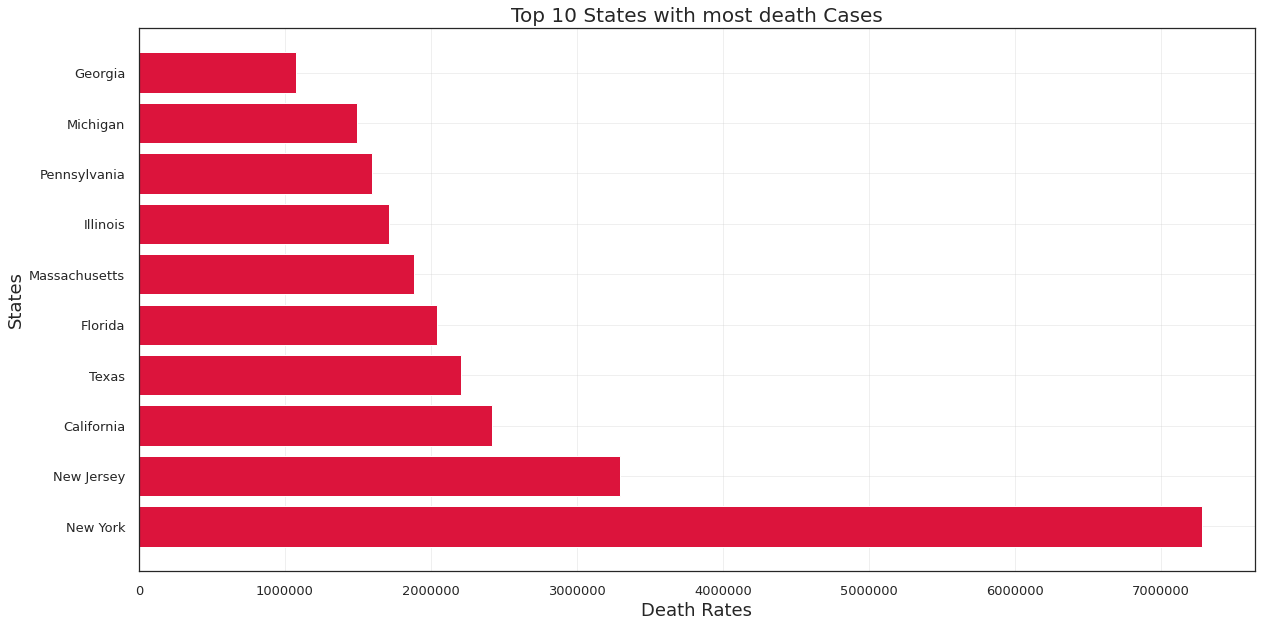

In [ ]:
import matplotlib.pyplot as plt

f= plt.figure(figsize=(20,10))
plt.axes(axisbelow=True)
plt.barh(df.groupby('Province_State')['Deaths'].sum().sort_values(ascending=False).index[:10],df.groupby('Province_State')['Deaths'].sum().sort_values(ascending=False).values[:10],color=["crimson"])
plt.tick_params(size=10,labelsize = 13)
plt.ticklabel_format(style='plain',axis='x')
plt.xlabel("Death Rates",fontsize=18)
plt.ylabel("States",fontsize=18)
plt.title("Top 10 States with most death Cases",fontsize=20)
plt.grid(alpha=0.3,which='both')

The above bar plot depicts the top 10 affected states

In [ ]:
a=list(df.groupby('Province_State')['Deaths'].sum().sort_values(ascending=False).index[:5])
a

['New York', 'New Jersey', 'California', 'Texas', 'Florida']

In [ ]:
df2=df[df.Province_State== 'New York'] 
df3=df[df.Province_State== 'New Jersey'] 
df4=df[df.Province_State== 'California'] 
df5=df[df.Province_State== 'Texas'] 
df6=df[df.Province_State== 'Florida']
frames = [df4, df2, df3, df5, df6]

result = pd.concat(frames)



fig = px.area(result, x="Date", y="Deaths", facet_col="Province_State",color="Province_State",facet_col_wrap=1)
fig.show()

The visualization above states gradual increase in the most affected five states.

In [ ]:
df1=d.groupby('County')['Deaths','Population'].sum()
df1=df1.sort_values(by= 'Population',ascending=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



death: mean=117426.355 stdv=328091.919
population: mean=99150407.677 stdv=169687117.491


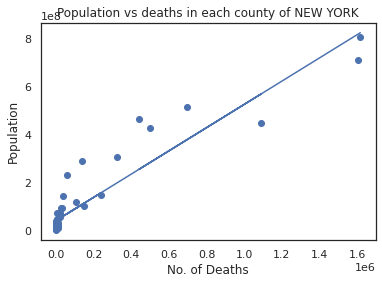

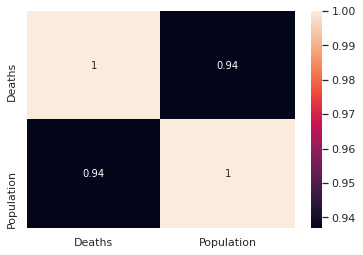

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
import seaborn as sn


x=df1['Deaths']
y=df1['Population']
# mean and standard deviation
print('death: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('population: mean=%.3f stdv=%.3f' % (mean(y), std(y)))
#plot

pyplot.scatter(x, y)
pyplot.xlabel('No. of Deaths')
pyplot.ylabel('Population')   
pyplot.title('Population vs deaths in each county of NEW YORK') 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
pyplot.show()
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

A corelation has been plotted between population and Deaths for the state 'New York'.

Merging 'deaths_df_long' dataset with 'Mobility Data



In [ ]:
# read data
mobility_data = pd.read_csv("https://storage.googleapis.com/mydata-777/Mobility_Data_County.csv", low_memory= False)
mobility_data.head()

country_region_code country_region  ... Unnamed: 13 Unnamed: 14
0                  US  United States  ...         NaN         NaN
1                  US  United States  ...         NaN         NaN
2                  US  United States  ...         NaN         NaN
3                  US  United States  ...         NaN         NaN
4                  US  United States  ...         NaN         NaN

[5 rows x 15 columns]


Performing the Data Cleaning, The date column is in string format, Converting from string to Datetime.

In [ ]:
#converting date from string to datetime
mobility_data['Date'] = pd.to_datetime(mobility_data['Date'])
mobility_data

country_region_code country_region  ... Unnamed: 13 Unnamed: 14
0                       US  United States  ...         NaN         NaN
1                       US  United States  ...         NaN         NaN
2                       US  United States  ...         NaN         NaN
3                       US  United States  ...         NaN         NaN
4                       US  United States  ...         NaN         NaN
...                    ...            ...  ...         ...         ...
121341                  US  United States  ...         NaN         NaN
121342                  US  United States  ...         NaN         NaN
121343                  US  United States  ...         NaN         NaN
121344                  US  United States  ...         NaN         NaN
121345                  US  United States  ...         NaN         NaN

[121346 rows x 15 columns]

In [ ]:
# Merging the two datasets deaths_df_long and mobility_data
merged = pd.merge(deaths_df_long, mobility_data, left_on=['County','Fedaral_code','Date'], right_on=['sub_region_2','census_fips_code','Date'])
merged

UID  Fedaral_code     County  ... Unnamed: 12 Unnamed: 13  Unnamed: 14
0       84001003        1003.0    Baldwin  ...         NaN         NaN          NaN
1       84001043        1043.0    Cullman  ...         NaN         NaN          NaN
2       84001069        1069.0    Houston  ...         NaN         NaN          NaN
3       84001073        1073.0  Jefferson  ...         NaN         NaN          NaN
4       84001089        1089.0    Madison  ...         NaN         NaN          NaN
...          ...           ...        ...  ...         ...         ...          ...
108240  84055117       55117.0  Sheboygan  ...         NaN         NaN          NaN
108241  84055127       55127.0   Walworth  ...         NaN         NaN          NaN
108242  84055133       55133.0   Waukesha  ...         NaN         NaN          NaN
108243  84056021       56021.0    Laramie  ...         NaN         NaN          NaN
108244  84056025       56025.0    Natrona  ...         NaN         NaN          NaN

[108245 rows x 24 columns]

In [ ]:
#Dropping irrelevant column Updated as it has same values
Final_mobility= merged.drop(['sub_region_1','UID','country_region_code','census_fips_code','country_region','Unnamed: 12','Unnamed: 13','Unnamed: 14'], axis = 1)
Final_mobility

Fedaral_code  ... residential_percent_change_from_baseline
0             1003.0  ...                                       -2
1             1043.0  ...                                        0
2             1069.0  ...                                       -1
3             1073.0  ...                                        0
4             1089.0  ...                                       -1
...              ...  ...                                      ...
108240       55117.0  ...                                        3
108241       55127.0  ...                                        4
108242       55133.0  ...                                        5
108243       56021.0  ...                                        5
108244       56025.0  ...                                        4

[108245 rows x 16 columns]

In [ ]:
#Renaming the column names
Final_mobility= Final_mobility.rename(columns={'Fedaral_code':'FIPS_code','Long_':'Lng','Province_State':'State','Country_Region':'Country','retail_and_recreation_percent_change_from_baseline': 'Retail_and_Recreation','grocery_and_pharmacy_percent_change_from_baseline':'Grocery_and_Pharmacy','parks_percent_change_from_baseline':'Parks','transit_stations_percent_change_from_baseline':'Transit_stations','workplaces_percent_change_from_baseline':'Workplaces','residential_percent_change_from_baseline':'Residential'})
Final_mobility

FIPS_code     County  ... Workplaces Residential
0          1003.0    Baldwin  ...          6          -2
1          1043.0    Cullman  ...          0           0
2          1069.0    Houston  ...         -1          -1
3          1073.0  Jefferson  ...          2           0
4          1089.0    Madison  ...          3          -1
...           ...        ...  ...        ...         ...
108240    55117.0  Sheboygan  ...         -4           3
108241    55127.0   Walworth  ...         -8           4
108242    55133.0   Waukesha  ...        -12           5
108243    56021.0    Laramie  ...        -17           5
108244    56025.0    Natrona  ...        -19           4

[108245 rows x 16 columns]

In [ ]:
Final_mobility.head()

FIPS_code     County    State  ... Transit_stations  Workplaces  Residential
0     1003.0    Baldwin  Alabama  ...                8           6           -2
1     1043.0    Cullman  Alabama  ...                0           0            0
2     1069.0    Houston  Alabama  ...                9          -1           -1
3     1073.0  Jefferson  Alabama  ...                3           2            0
4     1089.0    Madison  Alabama  ...                4           3           -1

[5 rows x 16 columns]

In [ ]:
Final_mobility.shape

(108245, 16)

In [ ]:
Final_mobility.isnull().sum()

FIPS_code                0
County                   0
State                    0
Country                  0
Lat                      0
Lng                      0
Population               0
Date                     0
Deaths                   0
sub_region_2             0
Retail_and_Recreation    0
Grocery_and_Pharmacy     0
Parks                    0
Transit_stations         0
Workplaces               0
Residential              0
dtype: int64

**Correlation**

To begin our analysis of how mobility is being impacted by Covid-19.

Let us start by looking at the correlation between the variables.



In [ ]:
Mobility_small= Final_mobility.iloc[:,[2,6,8,10,11,12,13,14,15]]
#Mobility_small

Plotting the Correlation using the Heatmap

Text(65.59375, 0.5, '')

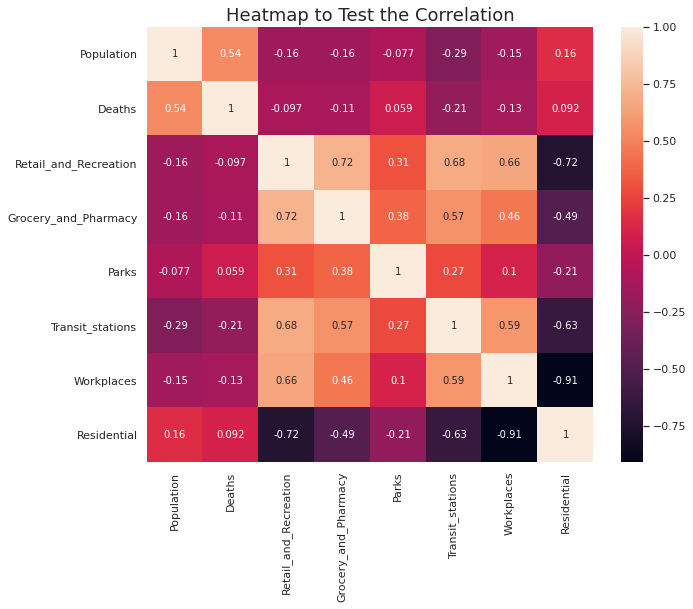

In [ ]:
c= Mobility_small.corr()
plt.figure(figsize=(10,8))
sns.heatmap(c,annot=True)
plt.title("Heatmap to Test the Correlation", Size= 18)
plt.xlabel("",)
plt.ylabel("",)
#c

**Positive Correlation**

It can be observed there is strong Positive Correlation between most of the mobility variables i,e Grocery & Pharmacy, Transit stations, Retail & Recreation, Workplaces, Parks.
There is a Correlation between Population and Deaths.

**Negative Correlation**

A strong negative Correlation of Residential mobility with Grocery & Pharmacy, Transit stations, Retail & Recreation, Workplaces. Also, there exists a slight negative Correlation with Parks as well.



---



Based on the correlations observed between the variables let us now see, which states have the higher visits to Grocery and Pharmacy. Also, where the death counts are not null

Let's see how the Covid-19 has impacted the mobility to Grocery & Pharmacy in the USA

In [ ]:
Top_Grocery= ((Final_mobility['Deaths']> 1)  & (Final_mobility['Grocery_and_Pharmacy']> 59))
#Final_mobility[Top_Grocery].sort_values(by=['Grocery_and_Pharmacy'], ascending=False)

We are now trying to visualize which are the top 10 States that have the highest mobility for Grocery & Pharmacy.

Below is the bar graph for the same.



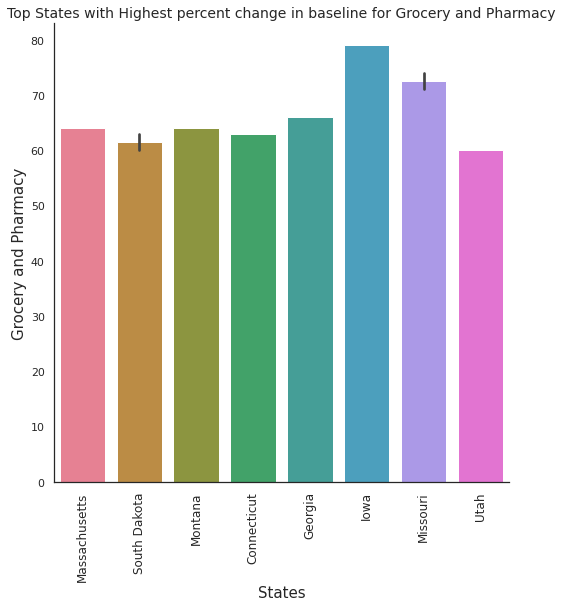

In [ ]:
sns.set(style="white",color_codes= True)
sns.catplot(x="State", y= "Grocery_and_Pharmacy", data=Final_mobility[Top_Grocery], kind="bar", palette="husl", height=7,legend=True, aspect=1)   
plt.xticks(rotation=90,size= 12)
plt.xlabel("States", size=15)
plt.ylabel("Grocery and Pharmacy", size=15)
plt.title("Top States with Highest percent change in baseline for Grocery and Pharmacy", size=14)          
plt.show()

From the above graph, we see that Iowa (Dubuque). Followed by Missouri (Cass & Platte) and Georgia (Camden) have the highest mobility for Grocery and Pharmacy.


---



Impact of Covid-19 on Transit stations and Retail & Recreational activities

Let us understand which states have the higher usage of Transit stations and also, let us compare that with the Retail and Recreational acivities. As we saw in the Heatmap above that the they are Positively the Correlated with each other.

In [ ]:
Top_transit= Final_mobility.nlargest(10,'Transit_stations')
#Top_transit

Finding the States with highest impact on Transit stations and plotting a bar graph below for the same.

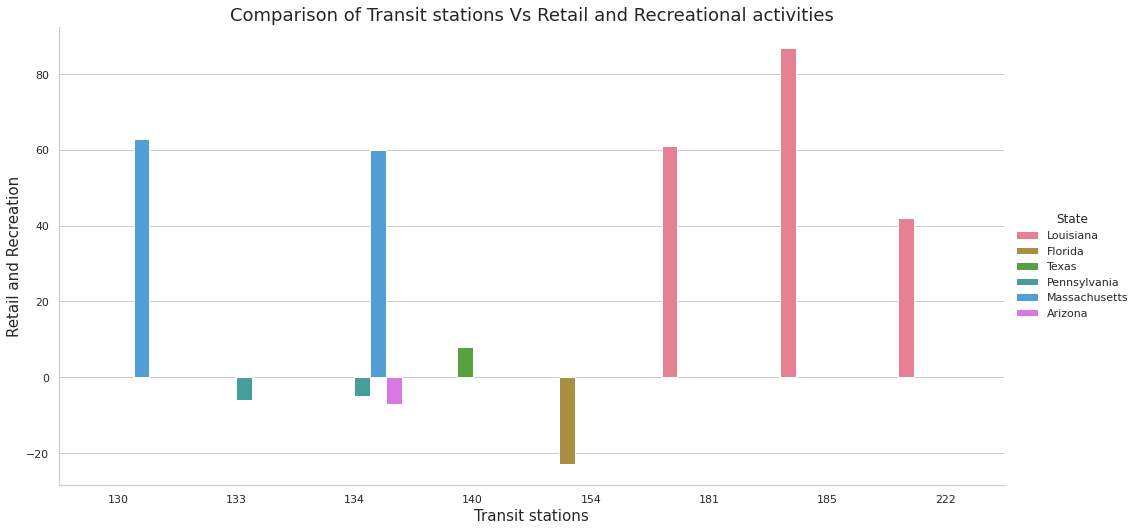

In [ ]:
sns.set(style="whitegrid",color_codes= True)
sns.catplot(x="Transit_stations", y="Retail_and_Recreation", hue= "State", palette="husl",data= Top_transit,kind="bar",height=7,aspect=2)
plt.xlabel("Transit stations", size=15)
plt.ylabel("Retail and Recreation", size=15)
plt.xticks(rotation=0)
plt.title("Comparison of Transit stations Vs Retail and Recreational activities", size=18)  
#plt.legend(title= "States", ncol=1, loc='upper right')
plt.show()


Transit stations in this data include Subway station, Sea port, Taxi stand,Highway rest stop and a Car rental agency.

From the graph above, we see that highest Transit is in Lousiana, followed by Florida and Texas.

We see an higher percentage of People in Lousiana are also involved in Retail and Recreational activities.



---



Let us now try to understand how the mobility trend is in the the State with highest number of Deaths.

In [ ]:
Final_mobility['Date']=Final_mobility['Date'].dt.strftime('%d/%m/%Y')

In [ ]:
high_sort= (Final_mobility['Deaths']>7470)
#Final_mobility[high_sort].sort_values(by=['Deaths'], ascending=False)

We, see that the highest number of Deaths are in New York. Let us understand the mobility trends by plotting a graph below.

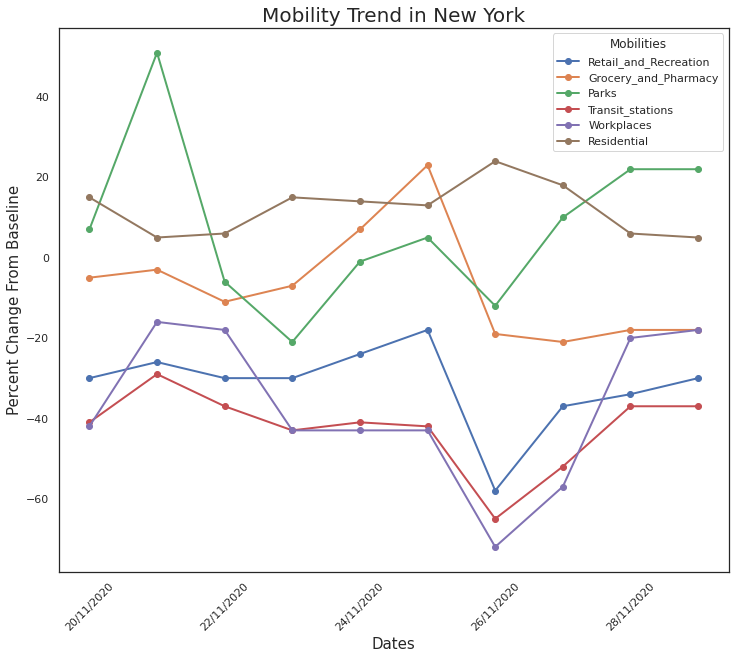

In [ ]:
sns.set(style="white",color_codes= False)
Final_mobility[high_sort].plot(x='Date', rot=45, y=['Retail_and_Recreation', 
                                       'Grocery_and_Pharmacy','Parks',
                             'Transit_stations',
                             'Workplaces',
                             'Residential'], figsize=(12,10), linewidth=2,marker = 'o')
#plt.legend(bbox_to_anchor=(1, 0.5), loc='lower left')
plt.legend(title= "Mobilities", ncol=1, loc='upper right')
plt.xlabel('Dates', size=15)
plt.ylabel('Percent Change From Baseline', size=15)
plt.title("Mobility Trend in New York", size=20)  
plt.show()

**Parks**

They typically consist of a Public garden, Castle, National forest, Camp ground
and Observation deck and they do not include the general outdoors found in rural areas.

From the graph, we see that people visiting the Parks spiked on 21-November and thereafter, it started reducing.

**Grocery and Pharmacy/Residential**

The spike in Grocery and Pharmacy was on 25-November that is a day before Thanksgiving. Also, the Residential Spike was on 26-November that was the Thanksgiving day and looks like many people stayed back home.

**Retail and Recreation**

People don't seem to be involved in Retail and Recreational activities and we can see that there is a sudden drop on the Thanksgiving day.

**Work Places and Transit Stations**

Most of the Companies are working remotely, there are not many people using the transit stations and going to workplaces.



---



Let's take deeper dive in the dataset to analyse the effect of lockdown on mobility and number of deaths. Considering Michigan data for this analysis. Lockdown was imposed in Michigan on 24th March till 19th June. We can compare the prelockdown and lockdown mobility data to get an idea about the effects on mobility hours. Also we have data after 19th June which will give us an idea about after effects of lockdown on mobility hours.

Extracting Michigan data from entire dataset using Query and sorting on basis of date column.

In [ ]:
#converting date from string to datetime
Final_mobility['Date'] = pd.to_datetime(Final_mobility['Date'])
#Final_mobility

In [ ]:
#Extracting only Michigan data from entire dataset
df1= Final_mobility.query("State == 'Michigan'")
df1.sort_values(by=['Date'], ascending=True)

FIPS_code     County  ... Workplaces Residential
7105      26021.0    Berrien  ...          8          -3
7106      26025.0    Calhoun  ...          6          -3
7115      26163.0      Wayne  ...          4          -2
7114      26161.0  Washtenaw  ...         -3          -2
7113      26125.0    Oakland  ...          5          -2
...           ...        ...  ...        ...         ...
100304    26025.0    Calhoun  ...        -27           8
100303    26021.0    Berrien  ...        -22           8
100314    26163.0      Wayne  ...        -36          10
100307    26077.0  Kalamazoo  ...        -30          11
100313    26161.0  Washtenaw  ...        -46          19

[2792 rows x 16 columns]

Plotting mobility data vs Date column. Also including the Deaths on secondary axis of the plot, so as to check if there are any effect of mobility on death rate.

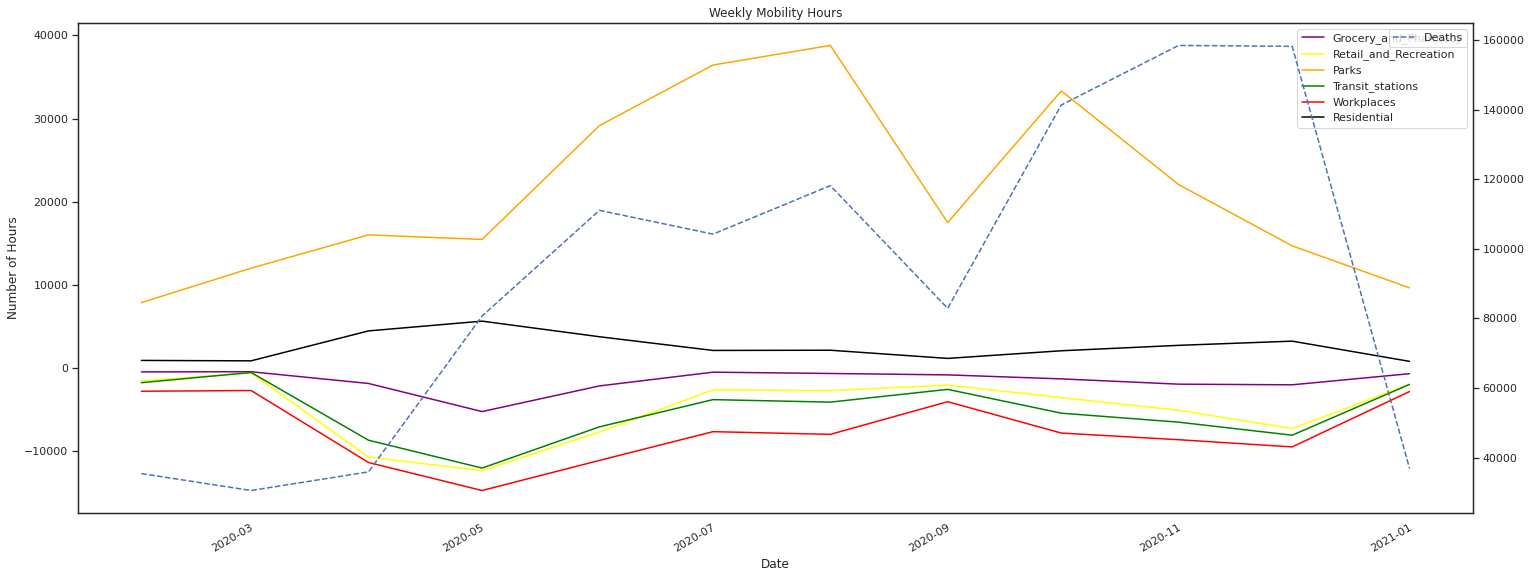

In [ ]:
#Plotting Mobility vs Date
import matplotlib.pyplot as plt
ts = pd.Series((df1['Grocery_and_Pharmacy'].values), index=df1['Date'])
ts2=ts.resample('M', closed='right', label='right').sum()
ts = pd.Series((df1['Retail_and_Recreation'].values), index=df1['Date'])
ts3=ts.resample('M', closed='right', label='right').sum()
ts = pd.Series((df1['Parks'].values), index=df1['Date'])
ts4=ts.resample('M', closed='right', label='right').sum()
ts = pd.Series((df1['Transit_stations'].values), index=df1['Date'])
ts5=ts.resample('M', closed='right', label='right').sum()
ts = pd.Series((df1['Workplaces'].values), index=df1['Date'])
ts6=ts.resample('M', closed='right', label='right').sum()
ts = pd.Series((df1['Residential'].values), index=df1['Date'])
ts7=ts.resample('M', closed='right', label='right').sum()
ts = pd.Series((df1['Deaths'].values), index=df1['Date'])
ts8=ts.resample('M', closed='right', label='right').sum()
fig= plt.figure(figsize=(25,10))
ts2.plot(label='Grocery_and_Pharmacy',style = 'purple',x_compat=True,title='Weekly Mobility Hours',xlabel='Date',ylabel='Number of Hours');plt.legend()
ts3.plot(label='Retail_and_Recreation',style = 'yellow',x_compat=True);plt.legend()
ts4.plot(label='Parks',style = 'orange',x_compat=True);plt.legend()
ts5.plot(label='Transit_stations',style = 'green',x_compat=True);plt.legend()
ts6.plot(label='Workplaces',style = 'red',x_compat=True);plt.legend()
ts7.plot(label='Residential',style = 'black',x_compat=True);plt.legend()
ts8.plot(secondary_y=True,style='b--',label='Deaths',x_compat=True);plt.legend()

From the plot above, we can see that hours at transit stations, Workplace , Retails and recreation are decreasing between the months march-april when lockdown has started and begins to go up after June. 

---
Number of deaths started increasing from april and it is somewhat stable till july. However it has drastically increased after september. So we can infer that as people started going out again after the lockdown caused increase in number of deaths.

We can drill down at counties in Michigan to take a closer look at the data.


In [ ]:
michigan_county = df1[['County','Deaths','Date','Retail_and_Recreation','Grocery_and_Pharmacy','Parks','Transit_stations','Workplaces','Residential']]
michigan_county = michigan_county.groupby('County').sum().reset_index()
top_5 = michigan_county.nlargest(5,'Deaths')
top_5

County  Deaths  ...  Workplaces  Residential
14    Wayne  547032  ...       -9332         2677
10  Oakland  222812  ...      -10010         3589
8    Macomb  174876  ...       -8231         2749
3   Genesee   54872  ...       -7195         1962
7      Kent   29020  ...       -7792         2564

[5 rows x 8 columns]

Wayne has highest recorded deaths followed by Oakland, Macomb.
Plotting County and their mobility hours.

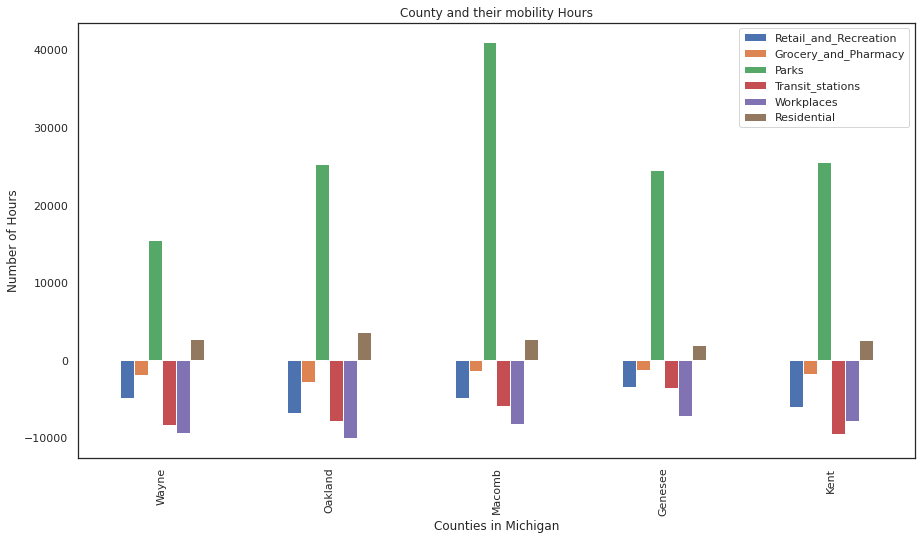

In [ ]:
top_5.plot(x="County", y=["Retail_and_Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"], kind="bar",figsize = (15,8),
           title='County and their mobility Hours',xlabel='Counties in Michigan',ylabel='Number of Hours')

From the above graph, we can not conclude that the mobility is affecting the death rate in any of the Michigan county. Say for example if we look at Wayne which has recorded highest deaths in michigan has all the mobility hours in negative (excluding Parks and Residential), meaning that people are staying indoors or following social distancing but still the cases are rising.

Similary, finding out the counties with lowest recorded deaths

In [ ]:
Bottom_5 = michigan_county.nsmallest(5,'Deaths')
Bottom_5

County  Deaths  ...  Workplaces  Residential
0   Allegan       0  ...          -1            1
5   Jackson      15  ...        -115           57
12  Saginaw     552  ...        -938          353
9    Monroe    4324  ...       -5666         1881
1   Berrien    5999  ...       -3611         1263

[5 rows x 8 columns]

Plotting County and their mobility hours for counties with lowest death rates.

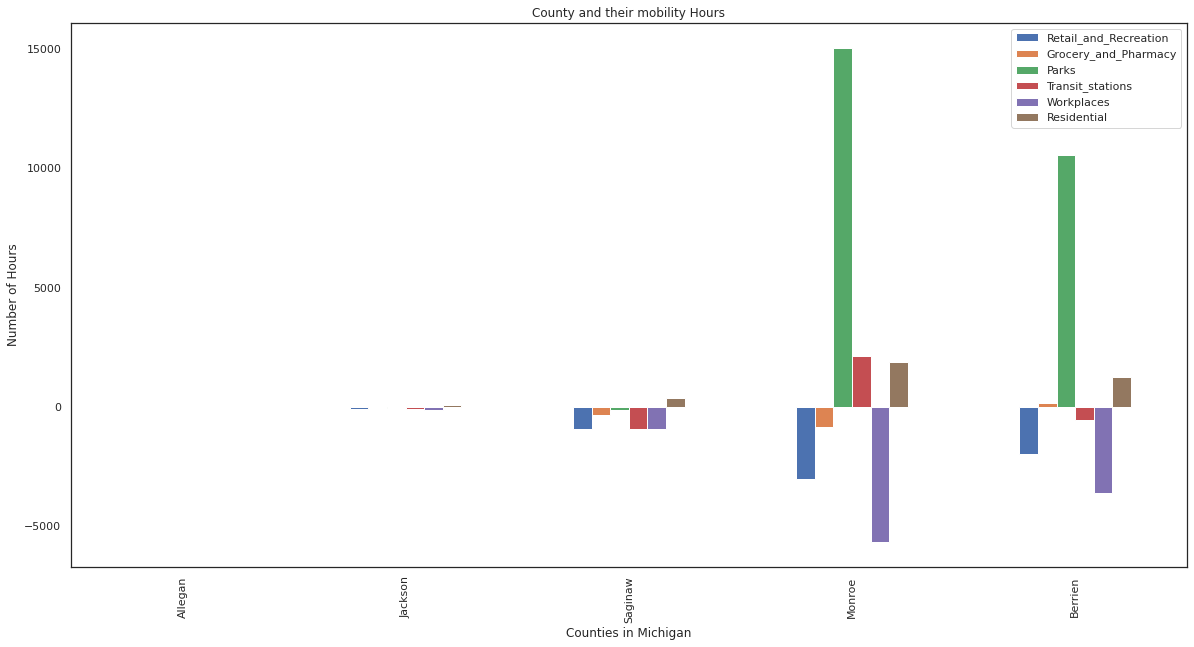

In [ ]:
Bottom_5.plot(x="County", y=["Retail_and_Recreation","Grocery_and_Pharmacy","Parks","Transit_stations","Workplaces","Residential"], kind="bar",figsize = (20,10),
              title='County and their mobility Hours',xlabel='Counties in Michigan',ylabel='Number of Hours')

Looking at the above graph,their seems to be a connection between mobility hours and number of deaths. Taking an example of Allegan and Jackson county which has 0 and 15 Deaths respectively, even the Park hours are in negative. The Allegan county mobility hours are not even visible on the graph.
Meaning that people are at home so the number of deaths are minimum.

Looking at the above 2 graphs for counties, first graph infers that the there is no relation between mobility hours and number of deaths but the second graph infers that there is a relation between them. 
So we can not conclude this analysis as 1 graph showes positive result and another one is showing negative result.

While doing the analysis , I found that hours spend in Parks is increased in lockdown in Michigan. So to check if this is true for all the other states as well, grouping the data on basis of State and plotting it against Park hours.

In [ ]:
df_states = Final_mobility.groupby('State').mean().reset_index()

Text(0, 0.5, 'Park Hours')

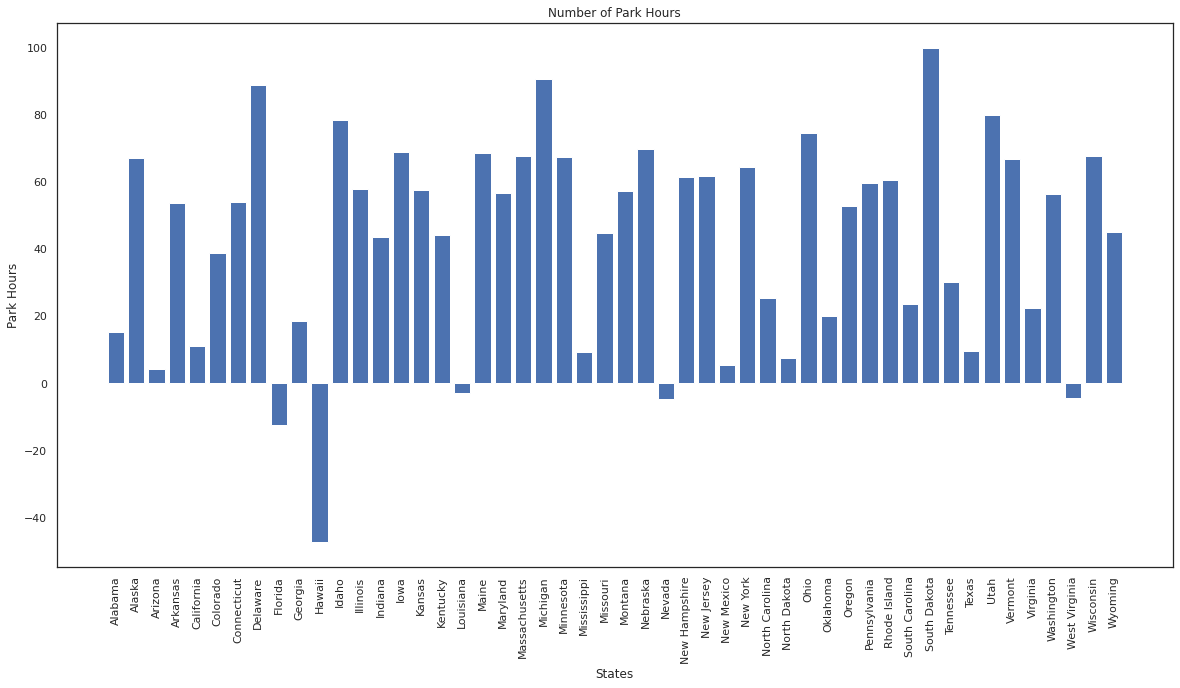

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(df_states.State, df_states.Parks)
plt.xticks(rotation=90)
plt.title('Number of Park Hours')
plt.xlabel('States')
plt.ylabel('Park Hours')

So apart from Hawai, Arizona and New Mexico all the other states are spending quite a lot of time in Parks.

Aggregating over death column, to determine the total deaths in each month. The aggregation of sum is taken by using grouby clause according to the month.

In [ ]:
# Total deaths every month
deaths_by_month  = deaths_df_long.groupby(deaths_df_long.Date.dt.month).agg({'Deaths': 'sum'}).reset_index()
deaths_by_month['Month'] = (deaths_by_month.apply(lambda row: calendar.month_name[row.Date], axis =1))
deaths_by_month

Date   Deaths      Month
0      1        0    January
1      2        1   February
2      3    21974      March
3      4   937422      April
4      5  2640453        May
5      6  3506149       June
6      7  4296561       July
7      8  5220861     August
8      9  5833875  September
9     10  6721911    October
10    11  7387397   November
11    12   538753   December

Merging dataset 'deaths_by_month' with 'unemployment' as data is presented per month 

In [ ]:
# read data
Unemployment_Rate = pd.read_csv("https://storage.googleapis.com/mydata-777/Unemployment_Rate_Michigan.csv")
Unemployment_Rate

Date  ...                                         Highlights
0   1/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
1   2/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
2   3/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
3   4/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
4   5/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
5   6/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
6   7/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
7   8/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
8   9/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...
9  10/1/2020 0:00  ...  Michigan’s seasonally adjusted unemployment ra...

[10 rows x 6 columns]

Extracting just the month so as to merge the data

In [ ]:
Unemployment_Rate['Month'] = pd.DatetimeIndex(Unemployment_Rate['Date']).month
Unemployment_Rate['Month'] = (Unemployment_Rate.apply(lambda row: calendar.month_name[row.Month], axis =1))
Unemployment_Rate

Date  ...      Month
0   1/1/2020 0:00  ...    January
1   2/1/2020 0:00  ...   February
2   3/1/2020 0:00  ...      March
3   4/1/2020 0:00  ...      April
4   5/1/2020 0:00  ...        May
5   6/1/2020 0:00  ...       June
6   7/1/2020 0:00  ...       July
7   8/1/2020 0:00  ...     August
8   9/1/2020 0:00  ...  September
9  10/1/2020 0:00  ...    October

[10 rows x 7 columns]

In [ ]:
# Merging the two datasets df1 and df2
umemp_merged = pd.merge(deaths_by_month, Unemployment_Rate, left_on=['Month'], right_on=['Month'])
umemp_merged = umemp_merged.drop(['Date_x','Date_y','CalendarDate'], axis = 1) 
umemp_merged

Deaths      Month  ...  Rank                                         Highlights
0        0    January  ...    36  Michigan’s seasonally adjusted unemployment ra...
1        1   February  ...    32  Michigan’s seasonally adjusted unemployment ra...
2    21974      March  ...    26  Michigan’s seasonally adjusted unemployment ra...
3   937422      April  ...    49  Michigan’s seasonally adjusted unemployment ra...
4  2640453        May  ...    48  Michigan’s seasonally adjusted unemployment ra...
5  3506149       June  ...    45  Michigan’s seasonally adjusted unemployment ra...
6  4296561       July  ...    27  Michigan’s seasonally adjusted unemployment ra...
7  5220861     August  ...    37  Michigan’s seasonally adjusted unemployment ra...
8  5833875  September  ...    41  Michigan’s seasonally adjusted unemployment ra...
9  6721911    October  ...    17  Michigan’s seasonally adjusted unemployment ra...

[10 rows x 6 columns]

Graph comparison of unemployment rate in Michigan and the unemployment rate in the United States

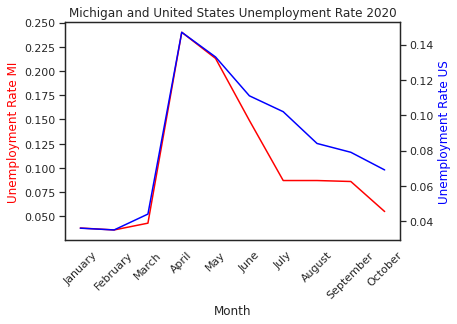

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
ax.plot(Unemployment_Rate.Month, Unemployment_Rate.Unemployment_Rate_MI, color = 'red')
ax.set_xlabel('Month')
ax.set_ylabel('Unemployment Rate MI', color = 'red')

ax2 = ax.twinx()
ax2.plot(Unemployment_Rate.Month, Unemployment_Rate.Unemployment_Rate_US, color = 'blue')
ax2.set_ylabel('Unemployment Rate US', color = 'blue')
ax.set_title('Michigan and United States Unemployment Rate 2020')
plt.show()


Michigan unemployment rank nationally over the course of 2020

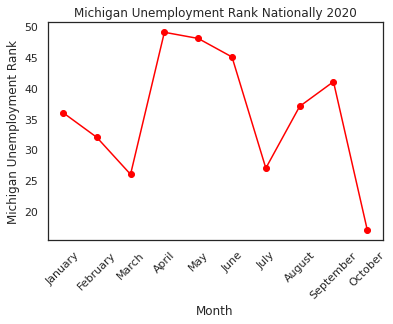

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
ax.plot(Unemployment_Rate.Month, Unemployment_Rate.Rank, color = 'red', marker = 'o')
ax.set_xlabel('Month')
ax.set_ylabel('Michigan Unemployment Rank')
ax.set_title('Michigan Unemployment Rank Nationally 2020')
plt.show()

According to thebalance.com/useconomy: 'The ideal real unemployment rate for the United States is 3.5% - 4.5%' so we are creating another column named 'unemployment status' that corresponds this metric to our dataset. In addition we created another column that takes changes the total amount of deaths from covid to the total amount of deaths per month

In [ ]:
umemp_merged['Deaths_By_Month'] = umemp_merged['Deaths'] - umemp_merged['Deaths'].shift(1)
umemp_merged['Unemployment_Status'] = np.where(umemp_merged['Unemployment_Rate_US'] > 0.045, 'Bad', 'Normal/Good')
umemp_merged.loc[0, 'Deaths_By_Month'] = 0
umemp_merged.Deaths_By_Month = umemp_merged.Deaths_By_Month.astype(int)
umemp_merged

Deaths      Month  ...  Deaths_By_Month  Unemployment_Status
0        0    January  ...                0          Normal/Good
1        1   February  ...                1          Normal/Good
2    21974      March  ...            21973          Normal/Good
3   937422      April  ...           915448                  Bad
4  2640453        May  ...          1703031                  Bad
5  3506149       June  ...           865696                  Bad
6  4296561       July  ...           790412                  Bad
7  5220861     August  ...           924300                  Bad
8  5833875  September  ...           613014                  Bad
9  6721911    October  ...           888036                  Bad

[10 rows x 8 columns]

Deaths nationally 2020 by month from COVID-19 we can see with this graph there is a pretty close correlation between the months of most covid deaths to the drastic rise in unemployment rate

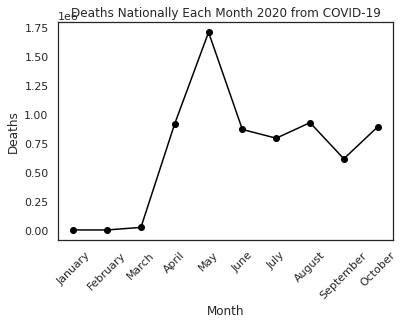

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
ax.plot(umemp_merged.Month, umemp_merged.Deaths_By_Month, color = 'black', marker = 'o')
ax.set_xlabel('Month')
ax.set_ylabel('Deaths')
ax.set_title('Deaths Nationally Each Month 2020 from COVID-19')
plt.show()

*Using* the graphs above we can see that the unemployment rate in the nation had a very direct correlation with the amount of deaths happening in the country, from this we can confirm the reason for drastically greater unemployment rate was most likely covid-19

Installs pandasql to further analyze data

In [ ]:
!pip install pandasql

In [ ]:
import pandasql as ps
query = '''SELECT * FROM umemp_merged ORDER BY Deaths_By_Month DESC'''
ps.sqldf(query, locals())


Deaths      Month  ...  Deaths_By_Month  Unemployment_Status
0  2640453        May  ...          1703031                  Bad
1  5220861     August  ...           924300                  Bad
2   937422      April  ...           915448                  Bad
3  6721911    October  ...           888036                  Bad
4  3506149       June  ...           865696                  Bad
5  4296561       July  ...           790412                  Bad
6  5833875  September  ...           613014                  Bad
7    21974      March  ...            21973          Normal/Good
8        1   February  ...                1          Normal/Good
9        0    January  ...                0          Normal/Good

[10 rows x 8 columns]

We can see that among the months with the greatest amount of deaths a correlation to those months and the months following having a much greater unemployment rate which concludes 

## **Conclusion:**

In the project, I have considered three datasets namely the time series of deaths, Mobility data, and unemployment rate during covid-19. 
Below are some of the key findings - 
Analyzing the Time Series of deaths, the Most affected state is 'New York' followed by 'Texas' and 'California'
On finding Correlation on the most affected state, we could find that deaths are strongly correlated with population, a state with the higher population is more likely to have impacted with higher deaths.

Analyzing Mobility data, I found that there is a strong Positive Correlation between most of the mobility variables i,e Grocery & Pharmacy, Transit stations, Retail & Recreation, Workplaces, Parks although there was a negative correlation on Residential area.

Analyzing Unemployment data,  I can see that the unemployment rate in the nation had a very direct correlation with the number of deaths happening in the country, from this it can confirm the reason for the drastically greater unemployment rate was most likely covid-19.


## **Data Sources**

Mobility Dataset- https://www.google.com/covid19/mobility/

Unemployment Dataset- https://data.michigan.gov/Economy/Unemployment-Rate/kamp-ngb9
